In [1]:
#mean-median filter

In [87]:
def convert(img1):
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range(m):
        for j in range(n):
            img2[i, j] = get_distance(img1[i, j,:])
    return img2

def get_distance(v, w = [1/3, 1/3, 1/3]):
    a, b, c = v[0], v[1], v[2]
    w1, w2, w3 = w[0], w[1], w[2]
    #d = ((a**2)*w1 + (b**2)*w2 + (c**2)*w3)**.5
    d = ((a*w1)**2 + (b*w2)**2 + (c*w3)**2)**.5
    return d

def get_default_mask_formean():
    return np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_formean()
    return sum(sum(part_of_image * mask))

In [88]:
block_1 = np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3,3)/9
sum(sum(block_1))

1.0

In [89]:
import os
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
os.getcwd(),os.listdir()


('C:\\Users\\kochallibrhm\\Desktop\\Görüntü İşleme\\week_04',
 ['.ipynb_checkpoints', 'chess.jpg', 'girl.png', 'README.MD', 'week4.ipynb'])

<function matplotlib.pyplot.show(close=None, block=None)>

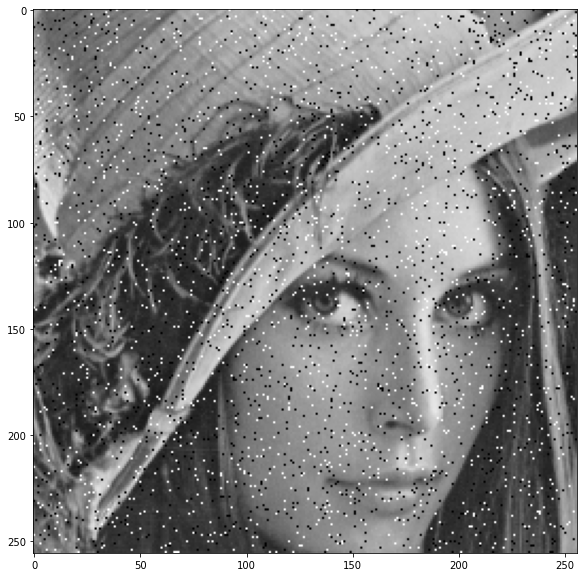

In [90]:
img1 = mpimg.imread('girl.png')
img2 = convert(img1)
%matplotlib inline
plt.figure(figsize = (10,10))
plt.imshow(img1)
plt.show

In [91]:
def get_default_mask_formean():
    return np.array([1, 1, 1, 1, 1, 1, 1, 1, 1]).reshape(3,3)/9

def apply_mask(part_of_image):
    mask = get_default_mask_formean()
    return sum(sum(part_of_image * mask))

def get_median_for_55(poi):
    s1 = poi.reshape(1,25)
    s1.sort()
    return s1[0,13]

def get_median(poi):
    s1 = poi.reshape(1, 9)
    s1.sort()
    return s1[0,4]

def get_mean_filter_for_55(img1):
    
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range (3, m-3):
        for j in range (3, n-3):
            poi = img1[i-2:i+3, j-2:j+3]
            img2[i, j] = get_median_for_55(poi)
    return img2

def get_mean_filter(img1):
    
    m = img1.shape[0]
    n = img1.shape[1]
    img2 = np.zeros((m, n))
    for i in range(1, m-1):
        for i in range(1, n-1):
            poi = img1[i-1:i+2, j-1:j+2]
            img2[i,j] = get_median(poi)
    return img2
    

In [92]:
i, j = 10, 10
poi100 = img1[i-2:i+3, j-2:j+3]
poi100.shape

(5, 5, 4)

In [93]:
i, j = 10, 10
poi100 = img2[i-2:i+3, j-2:j+3]
poi100.shape

(5, 5)

In [94]:
apply_mask(img2[1:4, 1:4])

0.3222595733992129

In [95]:
img55 = get_mean_filter_for_55(img2)
img555 = get_mean_filter(img2)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x17183674f70>)

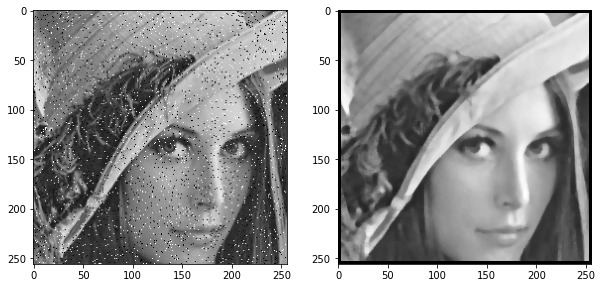

In [98]:
plt.figure(figsize = (10,10))
plt.subplot(1, 2, 1), plt.imshow(img2, cmap = 'gray')
plt.subplot(1, 2, 2), plt.imshow(img55, cmap = 'gray')